In [44]:
import pandas as pd
import numpy as np

In [2]:
text = pd.read_csv ('/Users/apple/Desktop/project with Carlo/Tweets/clean_data.csv')
text.head()

,tweet_ID,screenname,created_at,tweet
0,1.053301e+18,axjiwa,2018-10-19,TD bank sucks ass
1,1.041039e+18,ukfansallday,2018-09-15,Danny Clark with his 1st career TD run GetUp W...
2,1.069733e+18,VIPshawnc,2018-12-03,LaBar31 Saquon is also 14th in receiving with ...
3,1.014209e+18,gary_kai,2018-07-03,TDCanada Web Business Banking site is downstre...
4,1.021562e+18,Flash_Feed,2018-07-24,TD Bank to add 200 advisers to help wealthmana...


In [3]:
Sep = text.loc[text['created_at'] == '2018-09-09']
Sep.head()

,tweet_ID,screenname,created_at,tweet
75,1.038808e+18,ESwantje,2018-09-09,TDCanada I havent been able to login to easywe...
243,1.038811e+18,KnowWhatToKnow,2018-09-09,NTolliver1987 didnt he break the TD recordssea...
315,1.038904e+18,Andrew_Fenichel,2018-09-09,Adrian Peterson is now top10 all time in caree...
318,1.038882e+18,AndrewG227,2018-09-09,Giants mistakes continue to haunt them atleast...
353,1.038825e+18,PhilPerspective,2018-09-09,DonteStallworth That always rubbed me the wron...


In [4]:
Sep.to_csv('/Users/apple/Desktop/project with Carlo/Tweets/text_Sep.csv',columns=['tweet'],index=0,header=1)

In [5]:
May = text.loc[text['created_at'] == '2019-05-23']
May.head()

,tweet_ID,screenname,created_at,tweet
31090,1.131358e+18,TheUrbanNewz,2019-05-23,Wells Fargo TD Bank Have Given Trump Docs to C...
31112,1.131380e+18,Mandahl,2019-05-23,Wells Fargo TD Bank have already given Trumpre...
31114,1.131400e+18,walke_christina,2019-05-23,LoriB777 grgbkr37 WellsFargo TDBankUS Done
31117,1.131555e+18,LisaJacobs1966,2019-05-23,LoriB777 zeusFanHouse WellsFargo TDBankUS Dump...
31124,1.131663e+18,TimCrise,2019-05-23,Wells Fargo TD Bank turn over Trump financial ...


In [6]:
May.to_csv('/Users/apple/Desktop/project with Carlo/Tweets/text_May.csv',columns=['tweet'],index=0,header=1)

## Sentiment analysis for Sept 09 2018

In [8]:
text = pd.read_csv ('/Users/apple/Desktop/project with Carlo/Tweets/text_Sep.csv')
text.head()

,tweet
0,TDCanada I havent been able to login to easywe...
1,NTolliver1987 didnt he break the TD recordssea...
2,Adrian Peterson is now top10 all time in caree...
3,Giants mistakes continue to haunt them atleast...
4,DonteStallworth That always rubbed me the wron...


In [9]:
# remove special characters, numbers, punctuations
text['tidy_tweet'] = text['tweet'].str.replace("[^a-zA-Z#]", " ")

In [10]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt  
# remove unuseless word
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "TD")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "bank")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "career")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "tdcanada")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "td")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "Bank")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "Career")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "TDcanada")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "canada")
text['tidy_tweet'] = np.vectorize(remove_pattern)(text['tidy_tweet'], "Canada")

In [11]:
#deleted word len < 3

text['tidy_tweet'] = text['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
tokenized_tweet = text['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [havent, been, able, login, easyweb, since, Fr...
1    [NTolliver, didnt, break, recordsseason, while...
2    [Adrian, Peterson, time, rushing, yards, rushi...
3    [Giants, mistakes, continue, haunt, them, atle...
4    [DonteStallworth, That, always, rubbed, wrong,...
Name: tidy_tweet, dtype: object

In [13]:
import nltk

In [14]:
#stem extraction
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

text['clean_tweet'] = tokenized_tweet

In [15]:
text['clean_tweet'].head()

0    havent been abl login easyweb sinc friday sort...
1    ntolliv didnt break recordsseason while with b...
2    adrian peterson time rush yard rush touchdowns...
3    giant mistak continu haunt them atleast saquon...
4    dontestallworth that alway rub wrong like cert...
Name: clean_tweet, dtype: object

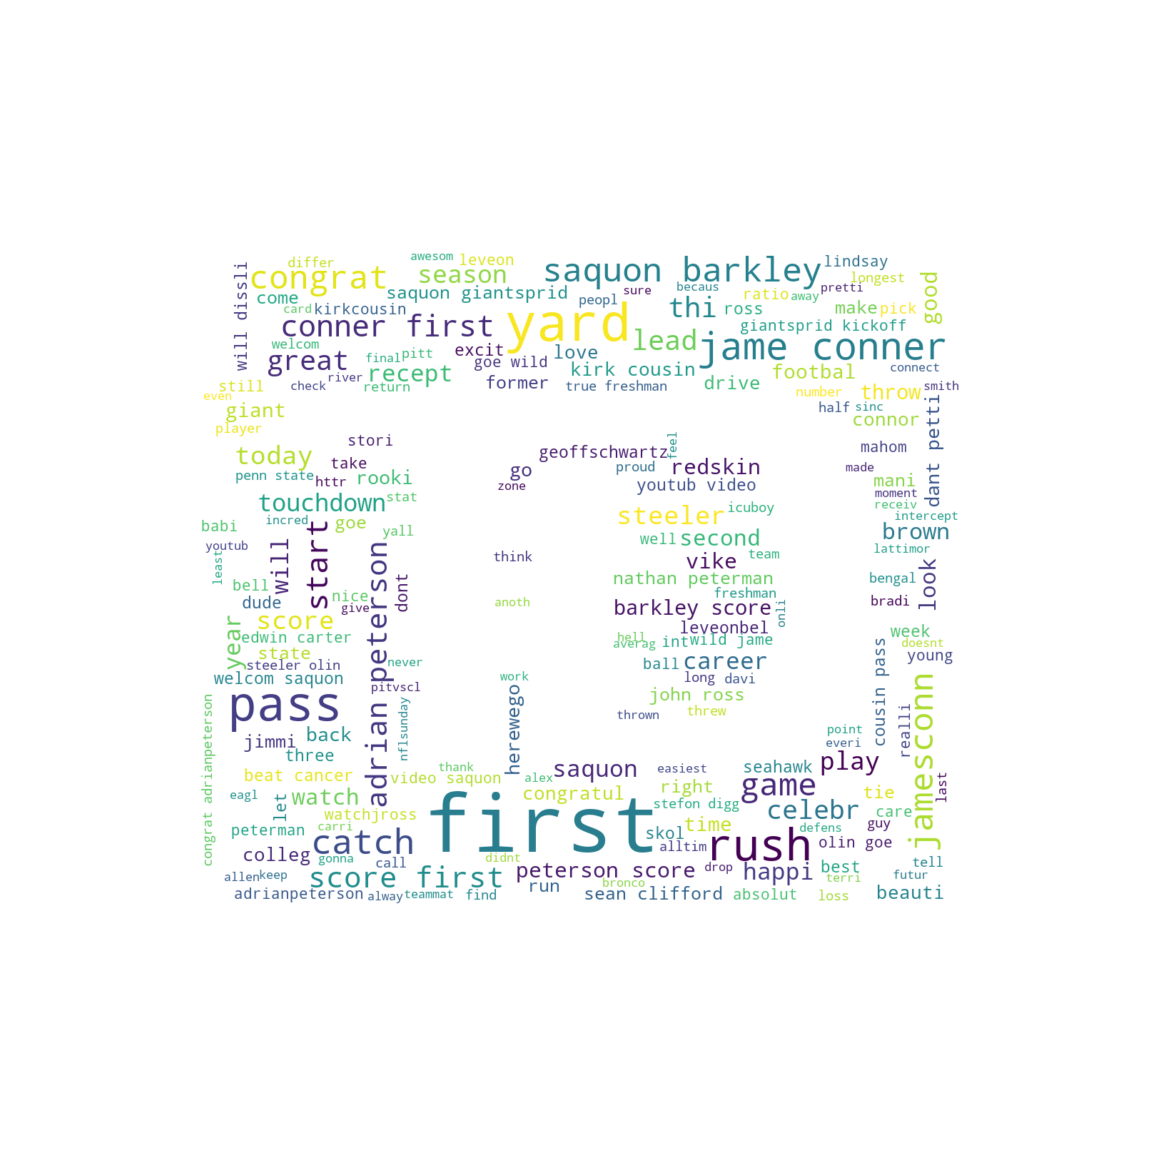

In [17]:
import matplotlib.pyplot as plt
import wordcloud

all_words = ' '.join([text for text in text['clean_tweet']])

import imageio
mk = imageio.imread("/Users/apple/Desktop/project with Carlo/Tweets/TD-bank.jpg")
w = wordcloud.WordCloud(mask=mk)

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height=500,mask=mk, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(30, 21))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
from textblob import TextBlob
import re
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [20]:
# We create a column with the result of the analysis:
text['SA'] = np.array([ analize_sentiment(tweet) for tweet in text['clean_tweet'] ])

In [21]:
pos_tweets = [ tweet for index, tweet in enumerate(text['clean_tweet']) if text['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(text['clean_tweet']) if text['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(text['clean_tweet']) if text['SA'][index] < 0]

In [22]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(text['clean_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(text['clean_tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(text['clean_tweet'])))

Percentage of positive tweets: 56.7699836867863%
Percentage of neutral tweets: 34.74714518760196%
Percentage de negative tweets: 8.482871125611746%


## Sentiment analysis for May 23 2019

In [33]:
text5 = pd.read_csv ('/Users/apple/Desktop/project with Carlo/Tweets/text_May.csv')
text5.head()

,tweet
0,Wells Fargo TD Bank Have Given Trump Docs to C...
1,Wells Fargo TD Bank have already given Trumpre...
2,LoriB777 grgbkr37 WellsFargo TDBankUS Done
3,LoriB777 zeusFanHouse WellsFargo TDBankUS Dump...
4,Wells Fargo TD Bank turn over Trump financial ...


In [34]:
# remove special characters, numbers, punctuations
text5['tidy_tweet'] = text5['tweet'].str.replace("[^a-zA-Z#]", " ")

In [35]:
# remove unuseless word
text5['tidy_tweet'] = np.vectorize(remove_pattern)(text5['tidy_tweet'], "TD")
text5['tidy_tweet'] = np.vectorize(remove_pattern)(text5['tidy_tweet'], "bank")
text5['tidy_tweet'] = np.vectorize(remove_pattern)(text5['tidy_tweet'], "career")
text5['tidy_tweet'] = np.vectorize(remove_pattern)(text5['tidy_tweet'], "tdcanada")
text5['tidy_tweet'] = np.vectorize(remove_pattern)(text5['tidy_tweet'], "td")
text5['tidy_tweet'] = np.vectorize(remove_pattern)(text5['tidy_tweet'], "Bank")
text5['tidy_tweet'] = np.vectorize(remove_pattern)(text5['tidy_tweet'], "Career")
text5['tidy_tweet'] = np.vectorize(remove_pattern)(text5['tidy_tweet'], "TDcanada")
text5['tidy_tweet'] = np.vectorize(remove_pattern)(text5['tidy_tweet'], "canada")
text5['tidy_tweet'] = np.vectorize(remove_pattern)(text5['tidy_tweet'], "Canada")

In [36]:
#deleted word len < 3

text5['tidy_tweet'] = text5['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [37]:
tokenized_tweet5 = text5['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet5.head()

0    [Wells, Fargo, Have, Given, Trump, Docs, Congr...
1    [Wells, Fargo, have, already, given, Trumprela...
2                    [LoriB, grgbkr, WellsFargo, Done]
3    [LoriB, zeusFanHouse, WellsFargo, Dumped, Well...
4    [Wells, Fargo, turn, over, Trump, financial, r...
Name: tidy_tweet, dtype: object

In [38]:
#stem extraction
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet5 = tokenized_tweet5.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet5.head()
for i in range(len(tokenized_tweet5)):
    tokenized_tweet5[i] = ' '.join(tokenized_tweet5[i])

text5['clean_tweet'] = tokenized_tweet5

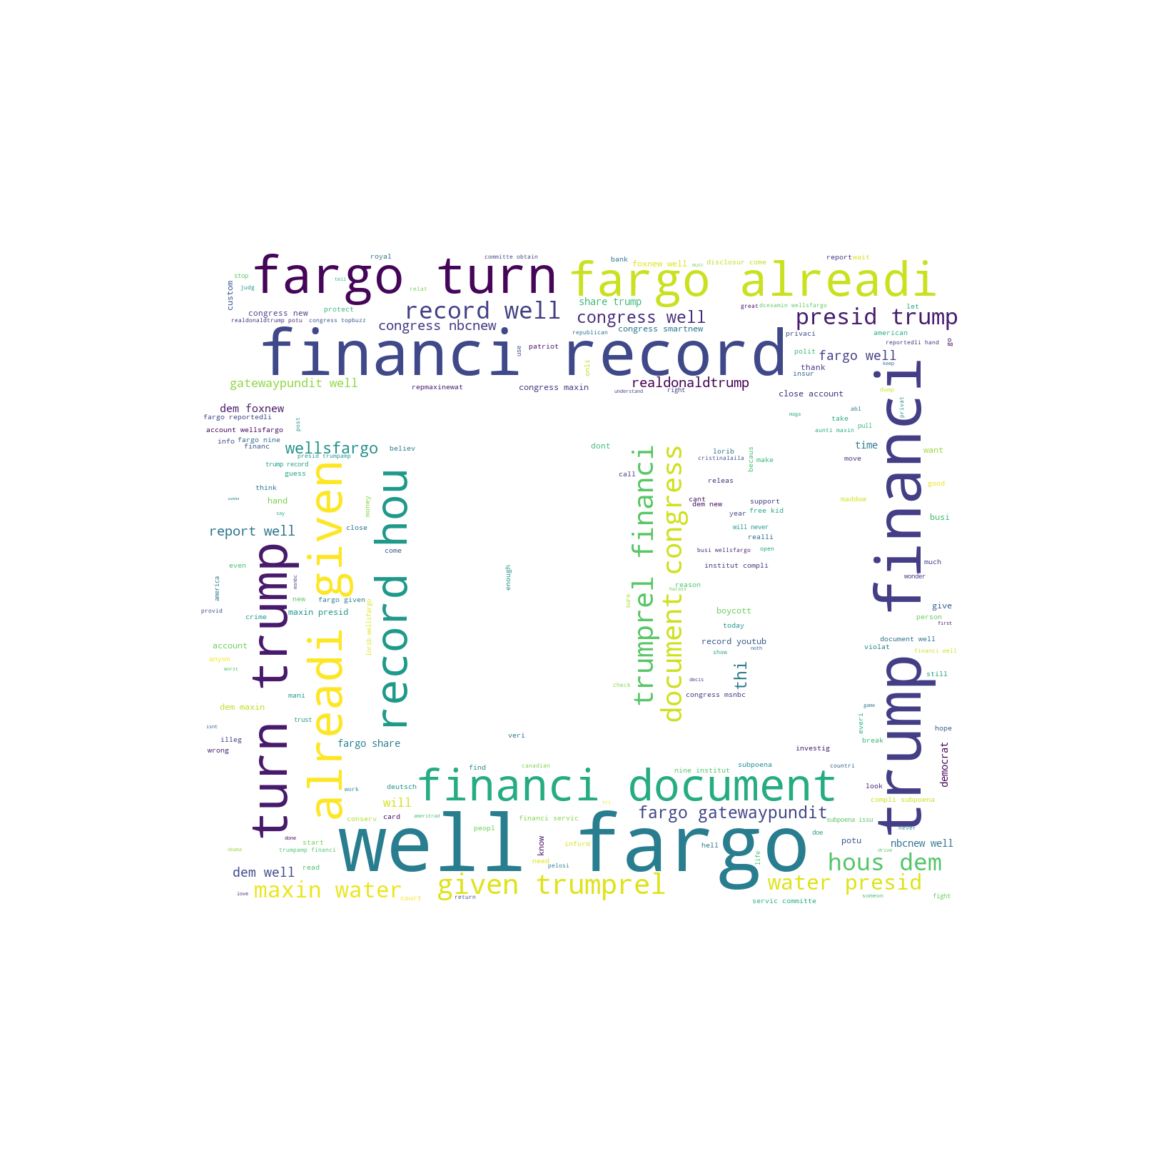

In [39]:
import wordcloud

all_words = ' '.join([text for text in text5['clean_tweet']])

import imageio
mk = imageio.imread("/Users/apple/Desktop/project with Carlo/Tweets/TD-bank.jpg")
w = wordcloud.WordCloud(mask=mk)

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height=500,mask=mk, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(30, 21))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
from textblob import TextBlob
import re
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [41]:
# We create a column with the result of the analysis:
text5['SA'] = np.array([ analize_sentiment(tweet) for tweet in text5['clean_tweet'] ])

In [42]:
pos_tweets = [ tweet for index, tweet in enumerate(text5['clean_tweet']) if text5['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(text5['clean_tweet']) if text5['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(text5['clean_tweet']) if text5['SA'][index] < 0]

In [43]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(text5['clean_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(text5['clean_tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(text5['clean_tweet'])))

Percentage of positive tweets: 11.209006363191385%
Percentage of neutral tweets: 84.18991678903573%
Percentage de negative tweets: 4.601076847772883%
